In [251]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, accuracy_score
import matplotlib.pyplot as plt

df = pd.read_csv('Iris.csv')

df_one_hot = pd.get_dummies(df, columns=['Species'])

#print(df_one_hot.columns)

df_one_hot = df_one_hot.drop(columns=['Id'])  

iris_features = df_one_hot.drop(columns=['Species_Iris-setosa', 'Species_Iris-versicolor', 'Species_Iris-virginica'])
iris_features_scaled = StandardScaler().fit_transform(iris_features)
X = iris_features_scaled

y = df_one_hot[['Species_Iris-setosa', 'Species_Iris-versicolor', 'Species_Iris-virginica']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

num_classes = y.shape[1]

model = tf.keras.Sequential([
    tf.keras.layers.Dense(2, activation='sigmoid', input_dim=4),
    tf.keras.layers.Dense(num_classes, activation='sigmoid')
])

custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.5)
model.compile(optimizer=custom_optimizer, loss='mse', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=5000, batch_size=len(X_train), verbose=0)


In [252]:

y_pred = model.predict(X_test)

y_pred_classes = pd.DataFrame(y_pred, columns=y_test.columns).idxmax(axis=1)

y_true_classes = y_test.idxmax(axis=1)

accuracy = accuracy_score(y_true_classes, y_pred_classes)


1/1 [==============================] - 0s 54ms/step


In [253]:
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


In [254]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 0.010776777751743793


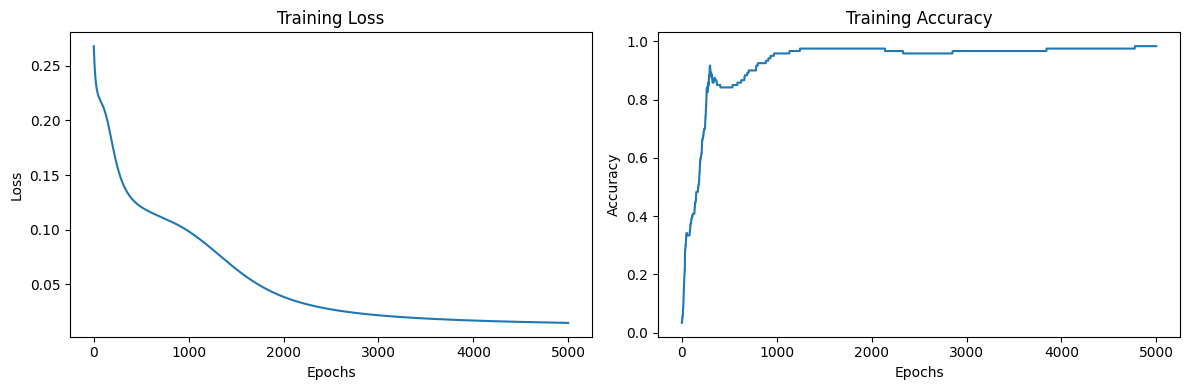

In [255]:

plt.figure(figsize=(12, 4))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()